# Recommendation Systems Overview

Recommendation systems are essential for providing personalized user experiences. Below are three primary types of recommendation systems:

## 1. Demographic Filtering

- **Description**: This method uses demographic information about users (such as age, gender, location, etc.) to make recommendations. It assumes that users with similar demographics will have similar preferences.
- **Example**: A music streaming service may recommend different playlists to users based on their age group or geographic region.

## 2. Content-Based Filtering

- **Description**: Content-based filtering recommends items based on the characteristics of the items themselves and the user's past behavior. It analyzes item features and matches them to the user’s preferences.
- **Example**: A movie recommendation system suggests films based on the genres and actors of movies that the user has previously liked.

## 3. Collaborative Filtering

- **Description**: Collaborative filtering relies on the preferences and behavior of multiple users. It assumes that users who agreed in the past will agree in the future. This method can be further divided into user-based and item-based approaches.
  - **User-Based**: Recommends items liked by similar users.
  - **Item-Based**: Recommends items similar to those the user has liked.
- **Example**: An e-commerce platform recommends products based on what similar users purchased.


The dataset from the Kaggle in the link below contains TMDB’s data for 5000 movies.

https://www.kaggle.com/tmdb/tmdb-movie-metadata


In [1]:
import os
import json

kaggle_credentials = {"username":"archanasaikannan", "key":"b1685a7f132df278a3e1cc25bbbfd086"}
os.makedirs('/root/.kaggle', exist_ok=True)

with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_credentials, f)

!chmod 600 /root/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d tmdb/tmdb-movie-metadata

Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
License(s): other
100% 8.89M/8.89M [00:00<00:00, 73.4MB/s]
100% 8.89M/8.89M [00:00<00:00, 73.0MB/s]


In [3]:
!ls

sample_data  tmdb-movie-metadata.zip


In [4]:
!unzip tmdb-movie-metadata.zip

Archive:  tmdb-movie-metadata.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


In [5]:
!ls

sample_data  tmdb_5000_credits.csv  tmdb_5000_movies.csv  tmdb-movie-metadata.zip


In [6]:
import pandas as pd

df1 = pd.read_csv("tmdb_5000_credits.csv")
df2 = pd.read_csv("tmdb_5000_movies.csv")

In [7]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


The Credits dataset contains the following features:

● ***movie_id -*** A unique identifier for each movie.

● ***title -*** The name of the movies.

● ***cast -*** The name of lead and supporting actors.

● ***crew -*** The name of Director, Editor, Composer, Writer, etc.

In [8]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


The Movies dataset has the following features:

● **budget** - The budget in which the movie was made.

● **genre** - The genre of the movie, Action, Comedy, Thriller, etc.

● **homepage** - A link to the homepage of the movie.

● **id** - This is in fact the movie_id as in the first dataset.

● **keywords** - The keywords or tags related to the movie.

● **original_language** - The language in which the movie was made.

● **original_title** - The title of the movie before translation or adaptation.

● **overview** - A brief description of the movie.

● **popularity** - A numeric quantity specifying the movie popularity.

● **production_companies** - The production house of the movie.

● **production_countries** - The country in which it was produced.

● **release_date** - The date on which it was released.

● **revenue** - The worldwide revenue generated by the movie.

● **runtime** - The running time of the movie in minutes.

● **status** - "Released" or "Rumored".

● **tagline** - Movie's tagline.

● **title** - Title of the movie.

● **vote_average** - average ratings the movie received.

● **vote_count** - the count of votes received.


In [9]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [10]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [11]:
df1.columns = ['id', 'movie_name', 'cast', 'crew']

df = df2.merge(df1, on="id")

df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_name,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
df.shape

(4803, 23)

In [14]:
df['id'].nunique()

4803

In [15]:
df['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [40]:
df['status'].value_counts()

,count
status,
Released,4795
Rumored,5
Post Production,3


In [22]:
df.drop(columns='id').describe().round(2)

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.00,4.803000e+03,4801.00,4803.00,4803.00
mean,2.904504e+07,21.49,8.226064e+07,106.88,6.09,690.22
std,4.072239e+07,31.82,1.628571e+08,22.61,1.19,1234.59
min,0.000000e+00,0.00,0.000000e+00,0.00,0.00,0.00
25%,7.900000e+05,4.67,0.000000e+00,94.00,5.60,54.00
50%,1.500000e+07,12.92,1.917000e+07,103.00,6.20,235.00
75%,4.000000e+07,28.31,9.291719e+07,118.00,6.80,737.00
max,3.800000e+08,875.58,2.787965e+09,338.00,10.00,13752.00


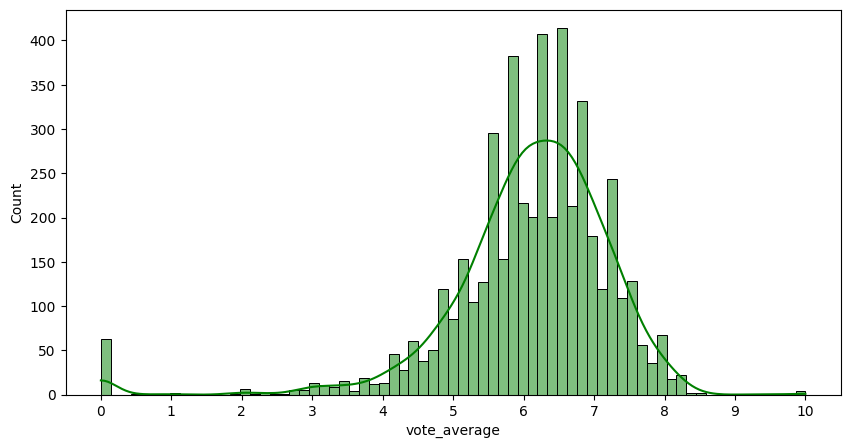

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df['vote_average'], kde=True, color='green', alpha=0.5)
plt.xticks(range(11))
plt.show()

The histogram of movie ratings from the TMDb dataset shows a roughly bell-shaped distribution with a slight left skew, indicating that most movies have average ratings (around 6-7) and there are more movies with higher ratings than lower ones. This suggests that creating a "decent" movie might be easier than an exceptional one. The presence of outliers at both ends of the distribution highlights movies that are either critically acclaimed or widely panned.

## Demographic Filtering for Movie Recommendations

Demographic filtering refers to the practice of offering generalized recommendations to users based on specific demographic characteristics of a population. In the context of a movie dataset, this method aims to recommend movies by assessing their ratings and vote counts.

### Overview of the Approach

To implement demographic filtering, we need to follow these steps:

1. **Define a Metric or Score for Movies**: We need a reliable way to rate movies.
2. **Calculate the Score for Each Movie**: Using the defined metric, compute a score for every movie in the dataset.
3. **Sort and Recommend**: Sort the movies based on their scores and recommend the highest-rated movies to users.

### Scoring Movies

Using the average rating alone can be misleading. For example, a movie with an average rating of $8.9$ based on just $3$ votes is less reliable than a movie with a rating of $7.8$ based on $40$ votes.

### Weighted Rating Formula

To address this, we can use the weighted rating formula, which helps balance the average rating with the number of votes. The formula is:

$$
\text{Weighted Rating} = \frac{v}{v + m} \times R + \frac{m}{v + m} \times C
$$

Where:
- $v$ = Number of votes for the movie
- $m$ = Minimum votes required to be listed in the chart
- $R$ = Average rating of the movie
- $C$ = Mean votes across the entire dataset

### Calculation Steps

1. **Vote Count ($v$)**:
   - **Count the Number of Ratings**: For each movie, count the number of user ratings. This will be your $v$.

2. **Average Rating ($R$)**:
   - **Calculate the Average**: For each movie, sum all ratings given by users and divide by the total number of ratings. This will give you the average rating, $R$.

   $$
   R = \frac{\text{Total Ratings}}{v}
   $$

3. **Mean Votes ($C$)**:
   - **Calculate the Mean of All Average Ratings**:
     - Sum all average ratings across movies.
     - Divide by the total number of movies.

   $$
   C = \frac{\sum R_i}{N}
   $$

   Where:
   - $\sum R_i$ = Total sum of average ratings for all movies
   - $N$ = Total number of movies in the dataset

4. **Determine Minimum Votes ($m$)**:
   - **Set Threshold Using Percentile**:
     - Calculate the 90th percentile of the vote counts to determine the threshold $m$. Movies must have more votes than this threshold to be considered for recommendations.

### Summary

By using demographic filtering with the weighted rating formula, we can create a more balanced and fair recommendation system. This approach ensures that higher-rated movies with sufficient votes are prioritized, providing users with reliable and relevant movie suggestions.

In [38]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_name', 'cast', 'crew'],
      dtype='object')

In [84]:
# Step 1: Calculate the average rating for each movie
average_ratings = df.groupby('title')['vote_average'].mean().reset_index()
average_ratings.rename(columns={'vote_average': 'average_rating'}, inplace=True)
average_ratings.sample(5)

,title,average_rating
1083,Dreaming of Joseph Lees,8.0
2295,Mission to Mars,5.7
2299,Mission: Impossible II,5.9
1267,Fetching Cody,6.8
563,Blue Ruin,6.9


In [93]:
# Step 2: Calculate the number of ratings for each movie
rating_counts = df.groupby('title')['vote_count'].sum().reset_index()
rating_counts.columns = ['title', 'ratings_count']
rating_counts.sample(5)

,title,ratings_count
3577,The Conjuring 2,1949
3425,The Angry Birds Movie,1022
3943,The Loss of Sexual Innocence,9
4597,Waiting...,237
4485,Troy,2759


In [94]:
# Step 3: Merge the average ratings and counts into one DataFrame
movie_stats = pd.merge(average_ratings, rating_counts, on='title')
movie_stats.sort_values(by=['ratings_count', 'average_rating'], ascending=False).head(10)

,title,average_rating,ratings_count
1797,Inception,8.1,13752
3611,The Dark Knight,8.2,12002
379,Avatar,7.2,11800
3438,The Avengers,7.4,11776
946,Deadpool,7.4,10995
1827,Interstellar,8.1,10867
1021,Django Unchained,7.8,10099
1527,Guardians of the Galaxy,7.9,9742
3806,The Hunger Games,6.9,9455
2155,Mad Max: Fury Road,7.2,9427


In [106]:
# Step 4: Define a minimum number of ratings and average rating
C = movie_stats['average_rating'].mean()  # Mean rating across all movies
m = movie_stats['ratings_count'].quantile(0.90)  # Choose a threshold for minimum ratings

print('Mean rating across all movies:', C)
print('Threshold for minimum ratings:', int(m))

Mean rating across all movies: 6.092
Threshold for minimum ratings: 1851


In [99]:
# Step 5: Calculate the weighted rating for each movie
def weighted_rating(x, m=m, C=C):
    v = x['ratings_count']
    R = x['average_rating']
    # Calculate weighted rating using the formula
    return (v / (v + m) * R) + (m / (v + m) * C)

# Step 6: Apply the weighted_rating function
movie_stats['weighted_rating'] = movie_stats.apply(weighted_rating, axis=1)
movie_stats.head()

,title,average_rating,ratings_count,weighted_rating
0,#Horror,3.3,52,6.015740
1,(500) Days of Summer,7.2,2904,6.768570
2,10 Cloverfield Lane,6.8,2468,6.496497
3,10 Days in a Madhouse,4.3,5,6.087174
4,10 Things I Hate About You,7.3,1701,6.670363


In [98]:
# Step 7: Sort the movies by weighted rating
top_movies = movie_stats.sort_values('weighted_rating', ascending=False)
top_movies.head()

,title,average_rating,ratings_count,weighted_rating
4189,The Shawshank Redemption,8.5,8205,8.056605
1274,Fight Club,8.3,9413,7.937031
3611,The Dark Knight,8.2,12002,7.918229
2720,Pulp Fiction,8.3,8428,7.902252
1797,Inception,8.1,13752,7.861698


In [108]:
# Step 8: Display the filtered movies that have at least `m` ratings (1851 minimum votes required)
filtered_movies = top_movies[top_movies['ratings_count']>=m][['title', 'weighted_rating']]
filtered_movies

,title,weighted_rating
4189,The Shawshank Redemption,8.056605
1274,Fight Club,7.937031
3611,The Dark Knight,7.918229
2720,Pulp Fiction,7.902252
1797,Inception,7.861698
...,...,...
1511,Green Lantern,5.523386
95,A Good Day to Die Hard,5.509049
183,After Earth,5.461281
1801,Independence Day: Resurgence,5.408277


In [109]:
filtered_movies.shape

(480, 2)

There are 480 movies which qualifies to be in this list.

In [110]:
# Step 9: Display the top recommended movies
top_recommendations = filtered_movies.head(10)
top_recommendations

,title,weighted_rating
4189,The Shawshank Redemption,8.056605
1274,Fight Club,7.937031
3611,The Dark Knight,7.918229
2720,Pulp Fiction,7.902252
1797,Inception,7.861698
3723,The Godfather,7.848152
1827,Interstellar,7.807644
1339,Forrest Gump,7.800810
3939,The Lord of the Rings: The Return of the King,7.725001
3652,The Empire Strikes Back,7.695059


This is similar to how the 'Trending Now' or 'Top Picks' tab is displayed on popular websites, where they show a list of popular or highly recommended content to users based on certain criteria. In this case, we are presenting the top 10 movies that have a high weighted rating, ensuring that they are not only popular but also highly rated by a significant number of users.

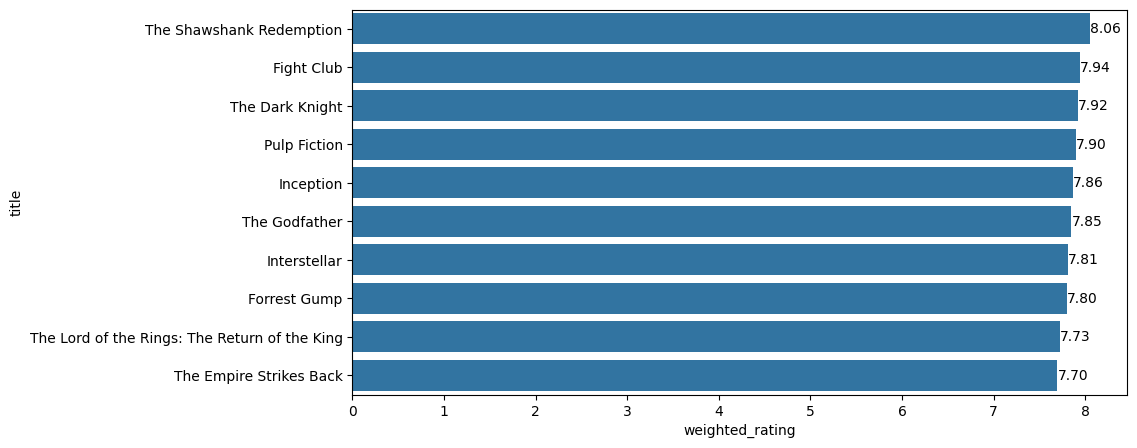

In [118]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='weighted_rating', y='title', data=top_recommendations)
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=10, color='black')
plt.show()

## Content-Based Filtering

The general idea behind **content-based filtering** is that if a person likes a particular item, they will also enjoy items that are similar to it. This technique recommends movies, articles, or other content that is similar to what the user has previously watched or read.

#### Some features of a movie:

- Overview  
- Cast  
- Crew  
- Keywords  
- Tagline  
- Genre  

For example, if the **cast**, **crew**, **keywords**, or **genre** of **Movie A** and **Movie B** are similar (with minimal differences), and a user likes **Movie A**, then we can recommend **Movie B** to the user!


In [119]:
df[['title', 'cast', 'crew', 'keywords', 'genres']].head(3)

,title,cast,crew,keywords,genres
0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


There might be a few columns in the dataset where the values are represented as string formats but are actually lists of dictionaries (e.g., cast, crew, keywords, genres). To ensure that all these columns are properly parsed as lists of dictionaries, we can use the eval() function. This function evaluates a string containing a Python expression and converts it into the corresponding Python object, in this case, a list of dictionaries.

In [120]:
# Access the first dictionary from the list (after evaluating the string)
eval(df['cast'].loc[0])[0]

{'cast_id': 242,
 'character': 'Jake Sully',
 'credit_id': '5602a8a7c3a3685532001c9a',
 'gender': 2,
 'id': 65731,
 'name': 'Sam Worthington',
 'order': 0}

In [122]:
features = ['cast', 'crew', 'keywords', 'genres']

for feature in features:
    df[feature] = df[feature].apply(eval)

df['crew'].loc[0][0]

{'credit_id': '52fe48009251416c750aca23',
 'department': 'Editing',
 'gender': 0,
 'id': 1721,
 'job': 'Editor',
 'name': 'Stephen E. Rivkin'}

Next, to find out the name of the director of the movie by checking if crew's job data is director and store the name in 'director' column in the dataframe.

In [123]:
def get_director(crew):
    for x in crew :
        if x['job'] == 'Director':
            return x['name']

df['director'] = df['crew'].apply(get_director)
df['director'].head()

,director
0,James Cameron
1,Gore Verbinski
2,Sam Mendes
3,Christopher Nolan
4,Andrew Stanton


In [124]:
df['keywords'][0]

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

Next, to convert the 'name' data in the list of dictionaries in the columns cast, keywords and genres into one single list. For this, we have to cross check if the value of the column is a list or not using isinstance() function.

In [125]:
def get_name_list(feature):
    if isinstance(feature, list):
        names = [x['name'] for x in feature]
        return names

features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_name_list)

In [126]:
df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,"[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,"[spy, based on novel, secret agent, sequel, mi...","[Action, Adventure, Crime]"


There might be multiple actors with the same name but with different capitalizations. For instance, "Johnny" with a capital "J" and "johnny" with a lowercase "j" might refer to the same person. To ensure consistency in our data, we need to create a function that converts the data to lowercase and removes spaces from the elements of these lists. This is important because we will be creating a metadata string for all the movies. We will then apply this function to the respective dataframe columns.

In [127]:
def clean_data(feature):
      if isinstance(feature, list):
          return [name.lower().replace(' ', '') for name in feature]
      elif isinstance(feature, str):
          return feature.lower().replace(' ', '')
      else:
          return ''

features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    df[feature] = df[feature].apply(clean_data)

As we move forward, we will create a string that contains all the metadata of a movie, including information about keywords, actors, director, and genres. We can then compare these strings to determine the similarity between movies. The more similar two strings are, the more likely it is that a user will enjoy one movie after watching another. This is the core idea behind content-based filtering. To measure the similarity between these strings, we will use the cosine similarity method!

 While the cast, keywords and genres columns are a list of elements, director is a string. To convert a list of elements into a string, we have join() method to take all the elements of the list, join them together and then return it in string format.


In [128]:
def metadata(row):
    combined_string = ' '.join(row['keywords']) + ' ' + ' '.join(row['cast']) + ' ' + row['director'] + ' ' + ' '.join(row['genres'])
    return combined_string

df['metadata'] = df.apply(metadata, axis=1) # pass on each row one by one

In [131]:
print(df['metadata'].head())

0    cultureclash future spacewar spacecolony socie...
1    ocean drugabuse exoticisland eastindiatradingc...
2    spy basedonnovel secretagent sequel mi6 britis...
3    dccomics crimefighter terrorist secretidentity...
4    basedonnovel mars medallion spacetravel prince...
Name: metadata, dtype: object


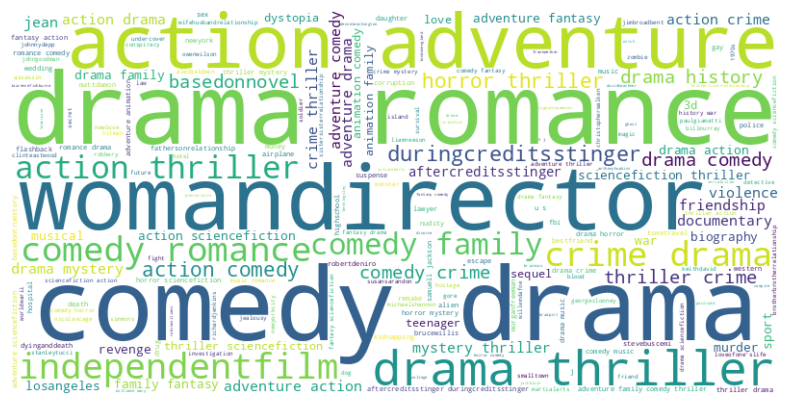

In [178]:
from wordcloud import WordCloud

# Combine all the metadata into a single string
text = ' '.join(df['metadata'].dropna())

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

We need to remove **stop words**—words that do not add significant meaning to a sentence but are essential for grammatical structure. Examples of stop words include "the", "and", "but", etc.

To compare movies effectively, we want to create an array that counts all the words in our metadata string and keeps track of the frequency of each word. This will allow us to measure similarity between two movies. For this, we will use the **CountVectorizer** method from scikit-learn's library.

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(df['metadata'])

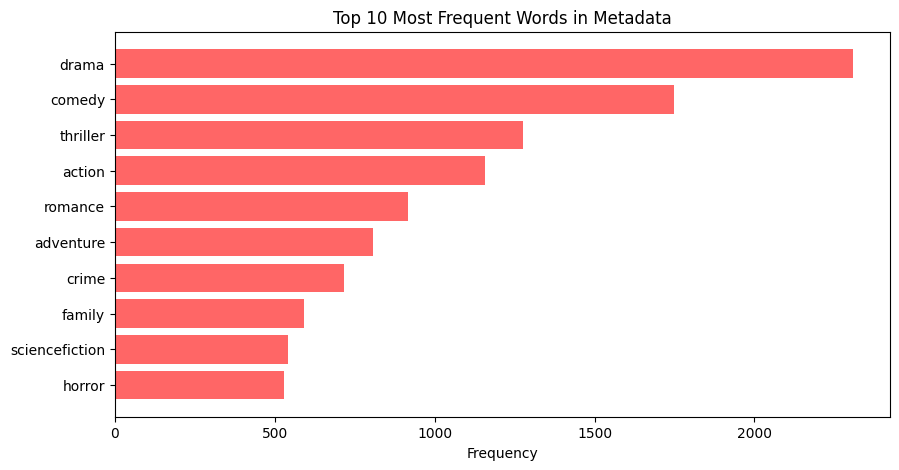

In [183]:
word_freq = count_matrix.toarray().sum(axis=0)  # word counts from the count_matrix
words = count.get_feature_names_out()   # words (features) from the CountVectorizer

# Create a DataFrame of words and their corresponding frequencies
word_count_df = pd.DataFrame(list(zip(words, word_freq)), columns=['word', 'count'])
top_words = word_count_df.sort_values(by='count', ascending=False).head(10) # # Sort the DataFrame by word count in descending order

# Plotting the top 10 words
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'], top_words['count'], color='red', alpha=0.6)
plt.xlabel('Frequency')
plt.title('Top 10 Most Frequent Words in Metadata')
plt.gca().invert_yaxis()  # To show the highest count at the top
plt.show()

We are then finally going to import the cosine_similarity function from sklearn and create a classifier based on our data with it.


In [135]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(count_matrix, count_matrix)

Reset index in our dataframe. Create a 1-D array that has index as name of the movies.

In [136]:
df.reset_index(inplace=True)
indices = pd.Series(df.index, index = df['title'])  # index of indices as title
indices.head(3)

,0
title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2


We will create the function that will get recommendations for us using our cosine_similarity classifier that we had created.


In [168]:
def get_recommendations(title, similarity=similarity):
    # Use .str.contains() to search for similar titles in the 'title' column, case insensitive
    matching_titles = df[df['title'].str.contains(title, case=False, na=False)]  # Find titles containing the string

    if matching_titles.empty:
        print(f"Movie title '{title}' not found in the dataset.")
        return None

    # Get the most similar match (first match if multiple titles are found)
    best_match_title = matching_titles['title'].iloc[0]
    print(f"Recommendations for the `{best_match_title}` Movie:")
    index = indices.get(best_match_title)   # get the index of the best match movie

    if index is None:
        print(f"Movie title '{best_match_title}' not found in the dataset after resolving close matches.")
        return None

    # To create a list of all the scores of the movies. This is the score of similarity of each movie with what the user likes.
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda score: score[1], reverse=True)  # Sort by descending order
    similarity_scores = similarity_scores[1:11]  # Exclude the movie itself (index 0)
    movie_indices = [i[0] for i in similarity_scores]   # Get the movie indices for recommendations
    return df['title'].iloc[movie_indices]  # Return the recommended movie titles

Finally, to test our model to check similar movie recommendations!

In [169]:
get_recommendations('Batman Begins')

Recommendations for the `Batman Begins` Movie:


,title
4638,Amidst the Devil's Wings
65,The Dark Knight
210,Batman & Robin
3,The Dark Knight Rises
1359,Batman
428,Batman Returns
3819,Defendor
1254,Get Carter
2371,RockNRolla
2440,Veronica Guerin


In [171]:
get_recommendations('Batman')

Recommendations for the `Batman v Superman: Dawn of Justice` Movie:


,title
14,Man of Steel
1296,Superman III
10,Superman Returns
428,Batman Returns
232,The Wolverine
1652,Dragonball Evolution
870,Superman II
163,Watchmen
210,Batman & Robin
3856,In the Name of the King III


In [172]:
get_recommendations('Spiderman')

Movie title 'Spiderman' not found in the dataset.


In [173]:
get_recommendations('The Godfather')

Recommendations for the `The Godfather: Part III` Movie:


,title
3337,The Godfather
2731,The Godfather: Part II
4638,Amidst the Devil's Wings
4589,Fabled
2915,Trash
2507,Slow Burn
4488,Adulterers
4780,Dutch Kills
944,Absolute Power
4205,N-Secure


In [174]:
get_recommendations('Fight Club')

Recommendations for the `Fight Club` Movie:


,title
1553,Se7en
946,The Game
421,Zodiac
4564,Straight Out of Brooklyn
45,World War Z
4462,The Young Unknowns
3863,August
3043,End of the Spear
1010,Panic Room
4101,Full Frontal


Wow! The recommended movies by our model are highly similar to the given movie title, based on metadata such as genre, director, description, actors, and more.

In [147]:
df.to_csv('movies.csv', index=False)

## Collaborative Filtering for Movie Recommendations

Collaborative filtering is a technique used to recommend items to users based on the preferences of other users. In the context of a movie dataset, this method aims to suggest movies by analyzing user ratings and identifying patterns in user behavior.

### Overview of the Approach

To implement collaborative filtering, we need to follow these steps:

1. **Create a User-Item Matrix**: Construct a matrix where rows represent users, columns represent movies, and the values represent ratings.
2. **Calculate Similarity**: Determine the similarity between users or items using metrics like cosine similarity.
3. **Generate Recommendations**: Use the similarity scores to recommend movies to users based on their past ratings.

### User-Item Matrix

The user-item matrix is essential for collaborative filtering as it captures the relationship between users and movies.

### Steps to Create and Use the User-Item Matrix

1. **Create the User-Item Matrix**:
   - Use a pivot table to create a matrix where rows represent users, columns represent movies, and values represent the ratings given by users. This will allow you to see how users have rated different movies.

2. **Fill Missing Values**:
   - Most likely, your user-item matrix will have many missing values (NaNs) for movies that users haven’t rated. You can fill these missing values with 0s or use some other imputation technique. Replace missing values (NaNs) with zeros or another suitable value to facilitate similarity calculations.

3. **Calculate Similarity**:
   - Use cosine similarity to measure the similarity between users or items.

   - **For User-Based Collaborative Filtering**:
     - Calculate the cosine similarity between users.

   - **For Item-Based Collaborative Filtering**:
     - Transpose the user-item matrix and calculate cosine similarity between items.

### Generating Recommendations

Using the similarity scores, we can generate movie recommendations based on a specific user’s ratings.

1. **Weighted Scores for Recommendations**:
   - For each user, calculate weighted scores for unseen movies based on the ratings of similar users.

2. **Sorting and Filtering**:
   - Sort the movies based on predicted scores and filter out movies that the user has already rated.

3. **Top Recommendations**:
   - Return the top N recommended movies.

### Summary

By implementing collaborative filtering using user ratings, we can create a recommendation system that suggests movies based on user preferences. This approach leverages the collective ratings of users to identify and recommend movies that similar users have enjoyed, thus providing personalized and relevant suggestions.


In [184]:
import pandas as pd

movie_titles = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/movie_titles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [185]:
movie_ratings = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/movie_ratings.csv')
movie_ratings.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [186]:
df = pd.merge(movie_ratings, movie_titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [187]:
df.shape

(100003, 5)

In [189]:
df['user_id'].nunique()

944

In [191]:
df['title'].nunique()

1664

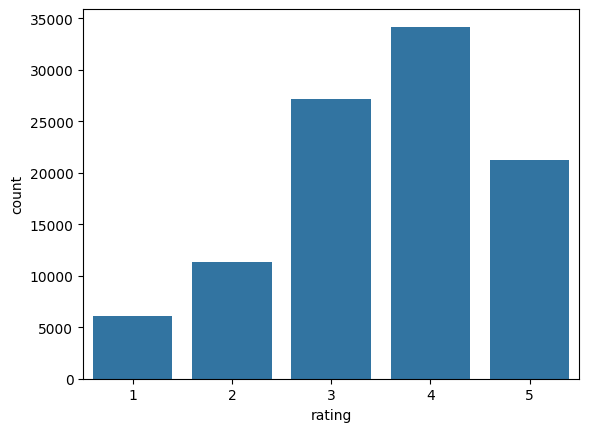

In [192]:
sns.countplot(x=df['rating'])
plt.show()

In [200]:
movie_stats = df.groupby('title').agg({'title': 'count', 'rating': 'mean'})
movie_stats.columns = ['rating_count', 'average_rating']
movie_stats['average_rating'] = movie_stats['average_rating'].round(2)
movie_stats.sort_values(by=['rating_count', 'average_rating'], ascending=False)

,rating_count,average_rating
title,,
Star Wars (1977),584,4.36
Contact (1997),509,3.80
Fargo (1996),508,4.16
Return of the Jedi (1983),507,4.01
Liar Liar (1997),485,3.16
...,...,...
"Very Natural Thing, A (1974)",1,1.00
"Vie est belle, La (Life is Rosey) (1987)",1,1.00
Wend Kuuni (God's Gift) (1982),1,1.00


### User-Based Collaborative Filtering

In [201]:
# Step 1: Create a User-Item Matrix
# Create a pivot table where rows are users, columns are movies, and values are ratings
user_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating')

# Step 2: Fill Missing Values
# Replace NaN values with 0s to facilitate similarity calculations
user_matrix.fillna(0, inplace=True)
user_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
from sklearn.metrics.pairwise import cosine_similarity

# Step 3: Calculate Cosine Similarity between users
user_similarity = cosine_similarity(user_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_matrix.index)

print("User Similarity Matrix:")
user_similarity_df.head()

User Similarity Matrix:


,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.119888,0.115540,0.000000,0.161475,0.149818,0.061204,0.084954,0.228361,0.170817,...,0.138757,0.000000,0.060767,0.154560,0.096390,0.000000,0.150342,0.000000,0.181809,0.118904
1,0.119888,1.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
2,0.115540,0.166931,1.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
3,0.000000,0.047460,0.110591,1.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
4,0.161475,0.064358,0.178121,0.344151,1.000000,0.031804,0.068044,0.091230,0.188060,0.101284,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752


In [203]:
# Step 4: Generating Recommendations
def recommend_movies(user_id, n=5):
    # Get the user's ratings
    user_ratings = user_matrix.loc[user_id]

    # Calculate weighted scores for each movie based on similar users' ratings
    similar_users = user_similarity_df[user_id]
    weighted_scores = similar_users.dot(user_matrix).divide(similar_users.sum(), axis=0)

    # Sort the movies based on the weighted scores
    recommendations = weighted_scores.sort_values(ascending=False)

    # Filter out movies that the user has already rated
    rated_movies = user_ratings.index[user_ratings > 0]
    recommendations = recommendations[~recommendations.index.isin(rated_movies)]

    # Get the top N recommendations
    top_movie_ids = recommendations.head(n).index

    # Map movie IDs to titles
    top_movie_titles = df[df['item_id'].isin(top_movie_ids)][['title', 'item_id']]

    # Ensure there are no duplicates in the recommendations
    top_movie_titles = top_movie_titles.drop_duplicates(subset='item_id')

    return top_movie_titles

In [204]:
print("\nRecommended Movies for User 0:")
recommend_movies(0)


Recommended Movies for User 0:


,title,item_id
27,Toy Story (1995),1
53,Fargo (1996),100
56,Return of the Jedi (1983),181
111,Raiders of the Lost Ark (1981),174
233,"Godfather, The (1972)",127


In [205]:
print("\nRecommended Movies for User 1:")
recommend_movies(1)


Recommended Movies for User 1:


,title,item_id
61,E.T. the Extra-Terrestrial (1982),423
64,Scream (1996),288
246,Schindler's List (1993),318
318,One Flew Over the Cuckoo's Nest (1975),357
391,"English Patient, The (1996)",286


### Item-Based Collaborative Filtering

In [206]:
# Step 1: Create Item-Item Matrix
item_matrix = user_matrix.T  # Transpose the user-item matrix

# Step 2: Calculate Cosine Similarity between items
item_similarity = cosine_similarity(item_matrix)

# Creating DataFrame using the original item indices (item IDs)
item_similarity_df = pd.DataFrame(item_similarity, index=item_matrix.index, columns=item_matrix.index)
item_similarity_df.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
item_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,...,0.035387,0.0,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
2,0.402382,1.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
3,0.330245,0.273069,1.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,...,0.000000,0.0,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
4,0.454938,0.502571,0.324866,1.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,...,0.000000,0.0,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
5,0.286714,0.318836,0.212957,0.334239,1.000000,0.037299,0.334769,0.259161,0.272448,0.055453,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211


In [207]:
def recommend_similar_movies(movie_title, n=5):
    # Get the item_id for the given movie title
    movie_id_row = df.loc[df['title'].str.contains(movie_title)]

    if movie_id_row.empty:
        return f"Movie '{movie_title}' not found."

    movie_id = movie_id_row['item_id'].values[0]  # Get the single movie_id

    # Get the similarities for the specified movie
    similar_movies = item_similarity_df[movie_id]

    # Sort the movies based on the similarity scores
    recommendations = similar_movies.sort_values(ascending=False)

    # Filter out the movie itself
    recommendations = recommendations[recommendations.index != movie_id]

    # Get the top N recommendations
    top_movie_ids = recommendations.head(n).index

    # Map movie IDs to titles
    top_movie_titles = df[df['item_id'].isin(top_movie_ids)][['title', 'item_id']]

    # Ensure there are no duplicates in the recommendations
    top_movie_titles = top_movie_titles.drop_duplicates(subset='item_id')

    return top_movie_titles

In [208]:
movie_title = 'Jungle Book'
print(f"\nRecommended Movies Similar to '{movie_title}':")
recommend_similar_movies(movie_title)


Recommended Movies Similar to 'Jungle Book':


,title,item_id
154,Mary Poppins (1964),419
482,Pinocchio (1940),404
662,Beauty and the Beast (1991),588
788,Snow White and the Seven Dwarfs (1937),99
943,Mrs. Doubtfire (1993),393


In [209]:
movie_title = 'Batman'
print(f"\nRecommended Movies Similar to '{movie_title}':")
recommend_similar_movies(movie_title)


Recommended Movies Similar to 'Batman':


,title,item_id
90,Batman (1989),403
174,Batman Returns (1992),231
278,Cliffhanger (1993),576
402,Stargate (1994),62
1623,Demolition Man (1993),578


In [210]:
movie_title = 'Jurassic Park'
print(f"\nRecommended Movies Similar to '{movie_title}':")
recommend_similar_movies(movie_title, 10)


Recommended Movies Similar to 'Jurassic Park':


,title,item_id
1,"Empire Strikes Back, The (1980)",172
90,Batman (1989),403
111,Raiders of the Lost Ark (1981),174
126,"Terminator, The (1984)",195
128,True Lies (1994),385
223,Star Trek: The Wrath of Khan (1982),228
248,Speed (1994),568
333,Back to the Future (1985),204
484,Indiana Jones and the Last Crusade (1989),210
719,Top Gun (1986),161
